<a href="https://colab.research.google.com/github/NibroosAbrar/filmrecomendation/blob/main/Recomendation_System_Nibroos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
!pip install scikit-surprise

# Import Package dan Library
* Mengimpor library yang dibutuhkan untuk analisis data dan machine learning.
* Pandas dan NumPy untuk manipulasi data, Scikit-learn untuk model machine learning, Matplotlib dan Seaborn untuk visualisasi data.

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

# Load Data
* Crawling data dari github
* Dataset akan dimuat ke dalam variabel 'df' sebagai Pandas DataFrame.

In [57]:
urls = [
    'https://raw.githubusercontent.com/Rahmathidayat4299/dataset-movie-recomendation/master/Action.csv',
    'https://raw.githubusercontent.com/Rahmathidayat4299/dataset-movie-recomendation/master/Adventure.csv',
    'https://raw.githubusercontent.com/Rahmathidayat4299/dataset-movie-recomendation/master/Animation.csv',
    'https://raw.githubusercontent.com/Rahmathidayat4299/dataset-movie-recomendation/master/Comedy.csv',
    'https://raw.githubusercontent.com/Rahmathidayat4299/dataset-movie-recomendation/master/Crime.csv',
    'https://raw.githubusercontent.com/Rahmathidayat4299/dataset-movie-recomendation/master/Drama.csv',
    'https://raw.githubusercontent.com/Rahmathidayat4299/dataset-movie-recomendation/master/Fantasy.csv',
    'https://raw.githubusercontent.com/Rahmathidayat4299/dataset-movie-recomendation/master/Horror.csv',
    'https://raw.githubusercontent.com/Rahmathidayat4299/dataset-movie-recomendation/master/Mystery.csv',
    'https://raw.githubusercontent.com/Rahmathidayat4299/dataset-movie-recomendation/master/Music.csv',
    'https://raw.githubusercontent.com/Rahmathidayat4299/dataset-movie-recomendation/master/Romance.csv',
    'https://raw.githubusercontent.com/Rahmathidayat4299/dataset-movie-recomendation/master/Sci-Fi.csv',
    'https://raw.githubusercontent.com/Rahmathidayat4299/dataset-movie-recomendation/master/Thriller.csv',
    'https://raw.githubusercontent.com/Rahmathidayat4299/dataset-movie-recomendation/master/War.csv'
]

In [58]:
# Muat semua dataset dan gabungkan menjadi satu
dataframes = [pd.read_csv(url) for url in urls]
datafilm = pd.concat(dataframes, ignore_index=True)

In [59]:
# Cek hasil gabungan
print(datafilm.head())

                                                name  year movie_rated  \
0                                    The Dark Knight  2008       PG-13   
1                                          Inception  2010       PG-13   
2                                         The Matrix  1999           R   
3  The Lord of the Rings: The Fellowship of the Ring  2001       PG-13   
4                              The Dark Knight Rises  2012       PG-13   

  run_length                       genres            release_date  rating  \
0   2h 32min       Action; Crime; Drama;       18 July 2008 (USA)     9.0   
1   2h 28min  Action; Adventure; Sci-Fi;       16 July 2010 (USA)     8.8   
2   2h 16min             Action; Sci-Fi;      31 March 1999 (USA)     8.7   
3   2h 58min   Action; Adventure; Drama;   19 December 2001 (USA)     8.8   
4   2h 44min          Action; Adventure;       20 July 2012 (USA)     8.4   

   num_raters  num_reviews                                         review_url  
0     222452

In [60]:
# Simpan dataset gabungan ke file CSV
datafilm.to_csv('movies.csv', index=False)

In [61]:
file_path = '/content/movies.csv'
df = pd.read_csv(file_path)

# Data Understanding

### Cek ukuran data dan tipe data: Untuk memahami dimensi dan karakteristik dasar dataset. Ukuran dataset (jumlah baris dan kolom) memberikan gambaran tentang jumlah data yang akan diproses. Tipe data (misalnya, numerik, kategorikal, teks) menentukan jenis analisis dan pemrosesan yang dapat dilakukan.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1400 non-null   object 
 1   year          1400 non-null   int64  
 2   movie_rated   1400 non-null   object 
 3   run_length    1400 non-null   object 
 4   genres        1400 non-null   object 
 5   release_date  1400 non-null   object 
 6   rating        1400 non-null   float64
 7   num_raters    1400 non-null   int64  
 8   num_reviews   1400 non-null   int64  
 9   review_url    1400 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 109.5+ KB


### Cek missing value: Untuk mengidentifikasi data yang hilang atau tidak terisi pada setiap kolom dalam dataset. Data yang hilang dapat mengganggu proses analisis dan pemodelan machine learning.

In [63]:
print("\nCek missing values:")
print(df.isnull().sum())


Cek missing values:
name            0
year            0
movie_rated     0
run_length      0
genres          0
release_date    0
rating          0
num_raters      0
num_reviews     0
review_url      0
dtype: int64


### Cek duplikasi data: Untuk menemukan baris-baris data yang identik atau memiliki nilai yang sama di semua kolom. Data duplikat dapat menyebabkan bias dalam analisis dan pemodelan

In [64]:
# Cek jumlah data duplikat
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 264


### Statistik Deskriptif: Untuk memahami karakteristik data dan mengidentifikasi pola serta tren

In [65]:
# Statistik deskriptif untuk data numerik
df.describe()

,year,rating,num_raters,num_reviews
count,1400.000000,1400.000000,1.400000e+03,1400.000000
mean,2002.821429,7.482929,4.603176e+05,1113.824286
std,14.250926,0.740565,3.313899e+05,1105.450385
min,1915.000000,3.500000,1.929000e+04,102.000000
25%,1999.000000,7.000000,2.261742e+05,491.750000
50%,2006.000000,7.600000,3.902670e+05,844.000000
75%,2012.000000,8.000000,5.974852e+05,1319.000000
max,2020.000000,9.300000,2.258845e+06,10279.000000


In [66]:
# Statistik deskriptif untuk data kategorikal
for column in df.select_dtypes(include=['object']).columns:
    print(f"\nStatistik Deskriptif untuk kolom '{column}':")
    print(df[column].value_counts())


Statistik Deskriptif untuk kolom 'name':
name
The Lion King             4
Prisoners                 3
Now You See Me            3
L.A. Confidential         3
The Hateful Eight         3
                         ..
The Ottoman Lieutenant    1
The Caine Mutiny          1
Cross of Iron             1
Gettysburg                1
Lifeboat                  1
Name: count, Length: 912, dtype: int64

Statistik Deskriptif untuk kolom 'movie_rated':
movie_rated
R            602
PG-13        510
PG           186
G             52
Not Rated     25
Approved       9
Passed         6
TV-MA          3
GP             2
NC-17          1
Null           1
M/PG           1
TV-14          1
TV-PG          1
Name: count, dtype: int64

Statistik Deskriptif untuk kolom 'run_length':
run_length
1h 56min    35
1h 55min    34
2h 4min     34
1h 46min    32
1h 53min    31
            ..
1h 20min     1
3h 3min      1
3h 17min     1
1h 9min      1
4h 31min     1
Name: count, Length: 113, dtype: int64

Statistik Deskrip

### Cek Outlier
* Boxplot: Titik-titik di luar whisker boxplot menunjukkan potensi outlier. Outlier adalah data yang nilainya jauh berbeda dari data lainnya.

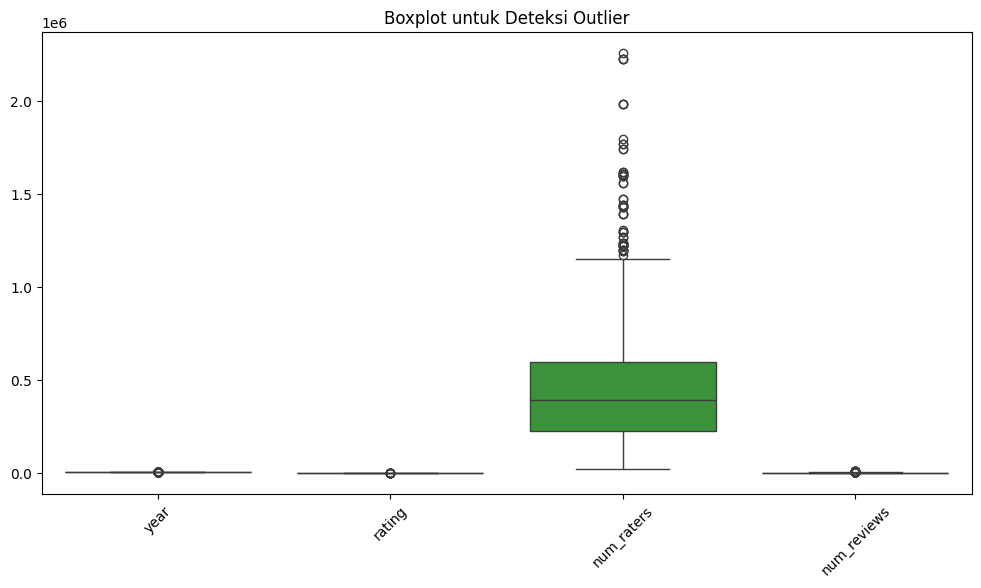

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih kolom numerik yang ingin divisualisasikan
numerical_cols = ['year', 'rating', 'num_raters', 'num_reviews']

# Buat boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot untuk Deteksi Outlier')
plt.xticks(rotation=45)
plt.show()

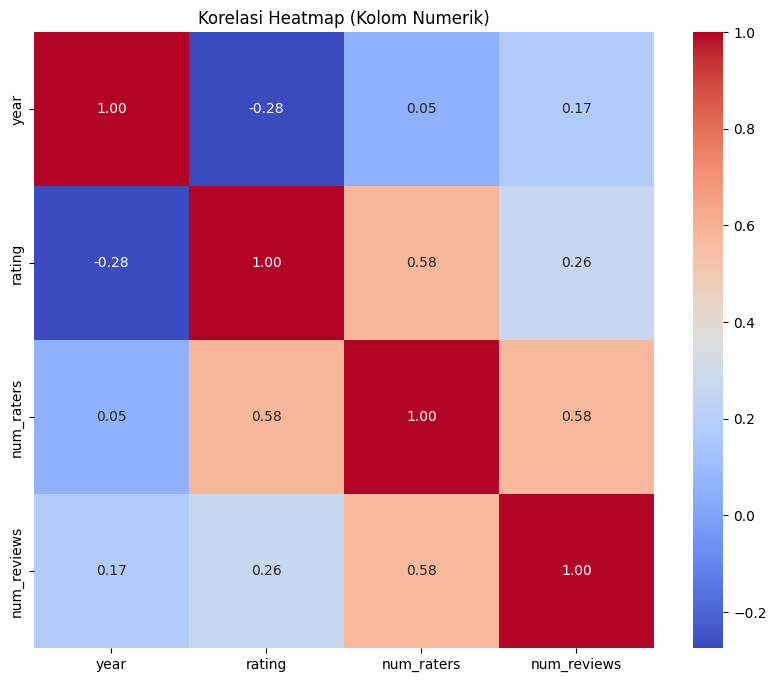

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih kolom numerik
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Menghitung matriks korelasi hanya untuk kolom numerik
correlation_matrix = df[numerical_cols].corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Heatmap (Kolom Numerik)')
plt.show()

# Data Preparation

* Menghapus duplikasi data

In [69]:
# Hapus data duplikat
df.drop_duplicates(inplace=True)

# Cek kembali jumlah data duplikat setelah dihapus
print("Jumlah data duplikat setelah dihapus:", df.duplicated().sum())

Jumlah data duplikat setelah dihapus: 0


* Drop kolom yag tidak relevan

In [70]:
# Asumsikan DataFrame 'df' sudah ada
print("Sebelum dihapus:", df.columns)  # Menampilkan kolom sebelum dihapus

# Drop kolom
df = df.drop(['release_date', 'review_url'], axis=1)

print("\nSetelah dihapus:", df.columns) # Menampilkan kolom setelah dihapus

Sebelum dihapus: Index(['name', 'year', 'movie_rated', 'run_length', 'genres', 'release_date',
       'rating', 'num_raters', 'num_reviews', 'review_url'],
      dtype='object')

Setelah dihapus: Index(['name', 'year', 'movie_rated', 'run_length', 'genres', 'rating',
       'num_raters', 'num_reviews'],
      dtype='object')


* Encoding kolom genres

In [71]:
# # Mengambil genre pertama dari kolom "Genre"
# df['genres'] = df['genres'].apply(lambda x: x.split(';')[0] if isinstance(x, str) else x)

In [72]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for array output

# Fit dan transform data
encoded_data = encoder.fit_transform(df[['genres']])

# Buat DataFrame dari data yang sudah di-encode
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['genres']))

# Gabungkan DataFrame yang sudah di-encode dengan DataFrame asli
df = pd.concat([df, encoded_df], axis=1)

* Features Extraction dengan TF-IDF

In [73]:
# Representasi konten: title + genre + rating (dalam string)
df['features'] = (
    df['name'].astype(str) + ' ' +
    df['genres'].astype(str) + ' ' +
    df['rating'].astype(str)
)

# TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['features'])


In [74]:
# Menampilkan 5 baris pertama data
print(df.head())

                                                name    year movie_rated  \
0                                    The Dark Knight  2008.0       PG-13   
1                                          Inception  2010.0       PG-13   
2                                         The Matrix  1999.0           R   
3  The Lord of the Rings: The Fellowship of the Ring  2001.0       PG-13   
4                              The Dark Knight Rises  2012.0       PG-13   

  run_length                       genres  rating  num_raters  num_reviews  \
0   2h 32min       Action; Crime; Drama;      9.0   2224522.0       6836.0   
1   2h 28min  Action; Adventure; Sci-Fi;      8.8   1981675.0       3820.0   
2   2h 16min             Action; Sci-Fi;      8.7   1619761.0       4281.0   
3   2h 58min   Action; Adventure; Drama;      8.8   1609165.0       5365.0   
4   2h 44min          Action; Adventure;      8.4   1470329.0       2979.0   

   genres_Action; Adventure;   genres_Action; Adventure; Comedy;   ...  \


In [75]:
df = df[df['name'].notnull()]  # Hilangkan baris dengan name kosong
df['name'] = df['name'].astype(str)  # Pastikan semua 'name' jadi string

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1136 entries, 0 to 1399
Columns: 175 entries, name to features
dtypes: float64(170), object(5)
memory usage: 1.5+ MB


# Bangun Model

* Bangun Model: Content-Based Filtering

In [77]:
# Cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [78]:
# Mapping judul
indices = pd.Series(df.index, index=df['name'].str.lower())

In [79]:
print("cosine_sim_matrix shape:", cosine_sim.shape)
print("df shape:", df.shape)

cosine_sim_matrix shape: (1362, 1362)
df shape: (1136, 175)


# Evaluasi model

In [80]:
def get_recommendations(title, cosine_sim_matrix, indices, top_n=10):
    title = title.lower()
    try:
        idx = indices[title]
        if isinstance(idx, (np.ndarray, pd.Series)):
            idx = int(idx[0]) if len(idx) > 0 else None
        else:
            idx = int(idx)
        if idx is None or idx >= cosine_sim_matrix.shape[0]:
            return []
    except KeyError:
        return []

    sim_scores = list(enumerate(cosine_sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n + 1]
    movie_indices = [i[0] for i in sim_scores if i[0] < len(df)]
    return df['name'].iloc[movie_indices].tolist()

# --- EVALUASI MODEL ---

# Split data
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
test_data['original_index'] = test_data.index
test_data = test_data.reset_index(drop=True)

cosine_sim_scores = []

def get_item_features(item_name, df):
    match = df[df['name'] == item_name]
    if not match.empty:
        row = match.iloc[0]
        return f"{row['name']} {row['genres']} {row['rating']}"
    return None

for index, row in test_data.iterrows():
    actual_item = row['name']
    recommended_items = get_recommendations(actual_item, cosine_sim, indices, top_n=10)

    if recommended_items:
        actual_features = tfidf.transform([f"{row['name']} {row['genres']} {row['rating']}"])

        recommended_features_list = [
            get_item_features(item, df) for item in recommended_items
        ]
        recommended_features_list = [f for f in recommended_features_list if f]

        if recommended_features_list:
            recommended_features = tfidf.transform(recommended_features_list)
            sim_scores = cosine_similarity(actual_features, recommended_features)
            avg_sim_score = np.mean(sim_scores)
            cosine_sim_scores.append(avg_sim_score)

# Hitung rata-rata skor similarity
if cosine_sim_scores:
    average_cosine_sim_score = np.mean(cosine_sim_scores)
    print(f"Average Cosine Similarity Score: {average_cosine_sim_score:.4f}")
else:
    print("No valid similarity scores could be computed.")

<ipython-input-80-6bad2b0b0fac>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  idx = int(idx[0]) if len(idx) > 0 else None


Average Cosine Similarity Score: 0.1303


# Inferensi Model

In [81]:
def recommend_movies(title, top_n=10):
    title = title.lower()
    matches = indices[indices.index == title]

    if matches.empty:
        return f"Film '{title}' tidak ditemukan."

    idx = matches.iloc[0]  # ambil hanya satu index pertama
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    movie_indices = [i[0] for i in sim_scores]

    return df[['name', 'genres', 'rating']].iloc[movie_indices]


In [82]:
# Contoh penggunaan
print("Rekomendasi untuk film seperti 'Avatar':")
print(recommend_movies("Avatar"))

Rekomendasi untuk film seperti 'Avatar':
                  name                        genres  rating
30                Thor  Action; Adventure; Fantasy;      7.0
659     Fantastic Four  Action; Adventure; Fantasy;      5.7
642          The Mummy  Action; Adventure; Fantasy;      7.0
655            Aquaman  Action; Adventure; Fantasy;      7.0
688           Warcraft  Action; Adventure; Fantasy;      6.8
698            Aladdin          Adventure; Fantasy;      7.0
274         Your Name.   Animation; Drama; Fantasy;      8.4
693       Ender's Game  Action; Adventure; Fantasy;      6.6
665  The Mummy Returns  Action; Adventure; Fantasy;      6.3
80        Wonder Woman  Action; Adventure; Fantasy;      7.4
